**Topic:** Value at Risk  
**Autor:** George ...  
**Date:** January 11, 2025  
**Page:** LinkeIn Github
***

## Historical Value at Risk

## Defining Historical Value at Risk
Value at risk is a loss that we are fairly sure will not be exceeded if the current portfolio is held over some period of time.  
VaR is measured at the portfolio level, without considering the mapping of portfolios to their risk factors  

### Basic Parameters of Historical Value at Risk  
#### Significance level $(\alpha)$ or confidence level $(1-\alpha)$
* Set by external regulators or based on the user's risk appetite.
* Examples:
    * Basel II regulation: 1% significance level (99% confidence level).
    * Credit rating agencies: May require stricter levels, e.g., 0.03% significance (99.97%).  

#### Risk Horizon $h$
* The time period over wich VaR is measured, typically in trading days
* Examples:
    * Basel II regulation: 10-day horizon.  
    * Adjusted based on asset liquidity and market conditions.

Risk Horizon and Liquidity  
Liquid assets:  

Risk assessed over shorter horizons (e.g., hours or 1 day).  
Example: Major currencies can be closed or hedged quickly.  
Illiquid assets:  

Require longer horizons due to negotiation difficulties.  
Example: Private placements depend on direct negotiations.  
Stressful market conditions:  
Reduced liquidity requires increasing the risk horizon.


Applications and Configurations of VaR
Intra-day market risks (Desk level):

Initially assessed over a 1-day horizon.
Extended to 10 days for regulatory capital and 1 year for internal capital allocation.
Credit rating and solvency:

Assess the probability of insolvency or default.
Example: Companies seeking an AA rating must demonstrate a default probability of 0.03% over 1 year (99.97% confidence).
Banking regulations (Basel II):

Internal VaR models at 99% confidence over a 10-day horizon.
VaR multiplied by a factor (3-4) to calculate market risk capital requirements.
Trading limits:

Use lower confidence levels and shorter horizons.
Example: 5% 1-day VaR (95% confidence). Losses exceeding this limit are monitored.

Additional Considerations
Dynamics of liquid risks:
Rapidly evolving; difficult to model long-term.
Regulators and rating agencies:
Often set a unified horizon, such as 1 year, for enterprise-wide risk assessments.


### Analysis

In [137]:
# Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [161]:
# Import Data from YahooFinance API
# Microsoft Inc.
data = yf.download('MSFT', '2005-01-01', '2025-01-03')['Close']
data = data.reset_index()
data.rename(columns={'Close':'Price'}, inplace=True)
data['Daily_Log_Return'] = np.log(data['Price']/data['Price'].shift(1))

# Daily HVaR
Daily_HVaR = np.percentile(data['Daily_Log_Return'].dropna(), (1 - 0.995) * 100)
print(f'Daily VaR: {Daily_HVaR:.4f}')

[*********************100%%**********************]  1 of 1 completed

Daily VaR: -0.0583


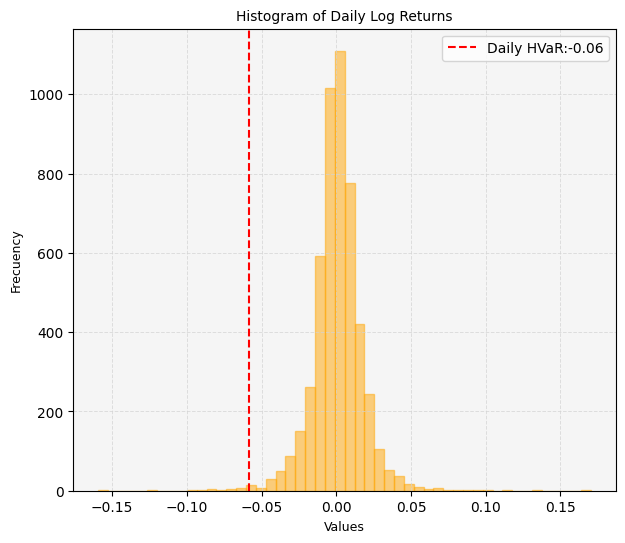

In [171]:
# Histogram
plt.figure(figsize=(7, 6))
plt.gca().set_facecolor('#f5f5f5')
plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title('Histogram of Daily Log Returns', fontsize = 10)
plt.hist(data['Daily_Log_Return'].dropna(), bins=50,alpha=0.5, color='orange', edgecolor='orange')
plt.axvline(x=Daily_HVaR, color='red', linestyle='--', linewidth=1.5, label=f'Daily HVaR:{Daily_HVaR:.2f}')
plt.xlabel('Values',fontsize=9)
plt.ylabel('Frecuency',fontsize=9)
plt.legend()
plt.show()

In [173]:
# Weekly
data['Weekly_Log_Return'] = np.log(data['Price']/data['Price'].shift(5))
Weekly_HVaR = np.percentile(data['Weekly_Log_Return'].dropna(), (1 - 0.995) * 100)
print(f'Weekly VaR: {Weekly_HVaR:.4f}')

Weekly VaR: -0.1168


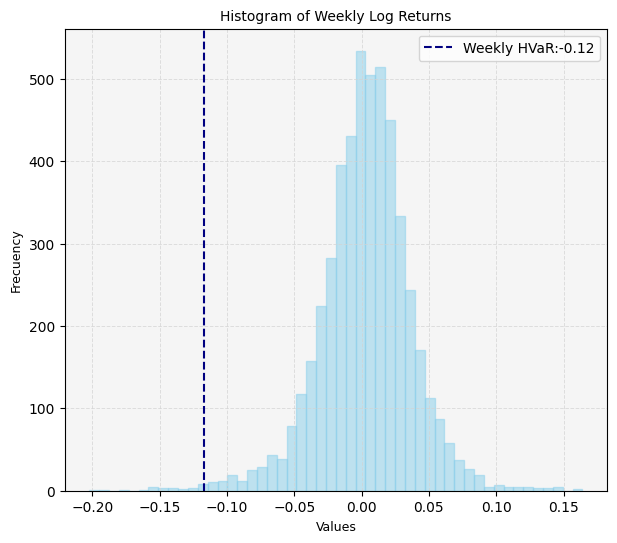

In [203]:
# Histogram
plt.figure(figsize=(7, 6))
plt.gca().set_facecolor('#f5f5f5')
plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title('Histogram of Weekly Log Returns', fontsize = 10)
plt.hist(data['Weekly_Log_Return'].dropna(), bins=50,alpha=0.5, color='skyblue', edgecolor='skyblue')
plt.axvline(x=Weekly_HVaR, color='navy', linestyle='--', linewidth=1.5, label=f'Weekly HVaR:{Weekly_HVaR:.2f}')
plt.xlabel('Values',fontsize=9)
plt.ylabel('Frecuency',fontsize=9)
plt.legend()
plt.show()

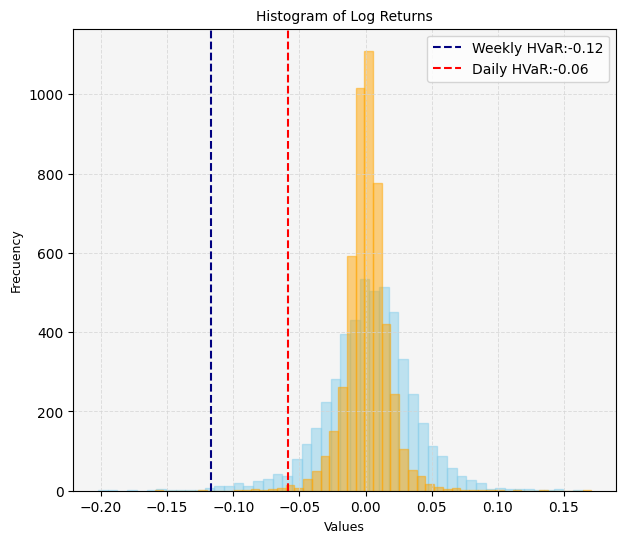

In [205]:
# Histogram
plt.figure(figsize=(7, 6))
plt.gca().set_facecolor('#f5f5f5')
plt.grid(color='lightgray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title('Histogram of Log Returns', fontsize = 10)
plt.hist(data['Weekly_Log_Return'].dropna(), bins=50,alpha=0.5, color='skyblue', edgecolor='skyblue')
plt.axvline(x=Weekly_HVaR, color='navy', linestyle='--', linewidth=1.5, label=f'Weekly HVaR:{Weekly_HVaR:.2f}')
plt.hist(data['Daily_Log_Return'].dropna(), bins=50,alpha=0.5, color='orange', edgecolor='orange')
plt.axvline(x=Daily_HVaR, color='red', linestyle='--', linewidth=1.5, label=f'Daily HVaR:{Daily_HVaR:.2f}')
plt.xlabel('Values',fontsize=9)
plt.ylabel('Frecuency',fontsize=9)
plt.legend()
plt.show()

In [197]:
# Function
def historicalVaR(tickers, start_date, end_date, var_days_list, confidence_level):
    # Close Prices
    prices = yf.download(tickers, start=start_date, end=end_date)['Close']
    
    # Conditional for one Ticker
    if isinstance(prices, pd.Series) and len(tickers) == 1:
        prices = prices.to_frame(name=tickers[0])
    
    # DataFrame
    h_var_dict = {ticker: {} for ticker in tickers}
    
    for var_days in var_days_list:
        rets = np.log(prices / prices.shift(var_days))
        for ticker in rets.columns:
            var = np.percentile(rets[ticker].dropna(), (1 - confidence_level) * 100)
            h_var_dict[ticker][f'HVaR_{var_days}'] = var
    
    # To Dictionary to DataFrame
    h_var_df = pd.DataFrame.from_dict(h_var_dict, orient='index').reset_index()
    h_var_df.rename(columns={'index': 'Ticker'}, inplace=True)
    h_var_df.sort_values(by='Ticker', ascending=True, inplace=True)
    h_var_df.reset_index(drop=True, inplace=True)
    
    return h_var_df

# Weekly Historical Value at Risk
tickers = ['AMZN', 'AAPL', 'NVDA', 'TSLA', 'INTC', 'META', 'MSFT', 'GOOGL', 'JPM', 'NFLX', 'COST', 'BAC']
start_date = '2005-01-01'
end_date = '2025-01-03'
var_days = [1, 2, 5, 22, 252]
confidence_level = 0.995

h_var = historicalVaR(tickers, start_date, end_date, var_days, confidence_level)
h_var

[*********************100%%**********************]  12 of 12 completed


,Ticker,HVaR_1,HVaR_2,HVaR_5,HVaR_22,HVaR_252
0,AAPL,-0.066510,-0.093412,-0.138314,-0.354158,-0.671712
1,AMZN,-0.081329,-0.111378,-0.169359,-0.340478,-0.678236
2,BAC,-0.115212,-0.168708,-0.291497,-0.624711,-1.964308
3,COST,-0.050960,-0.066470,-0.110309,-0.183227,-0.433745
4,GOOGL,-0.063609,-0.089583,-0.128084,-0.256222,-0.799275
5,INTC,-0.074532,-0.103850,-0.156177,-0.368105,-0.733639
6,JPM,-0.084760,-0.114535,-0.156443,-0.315687,-0.616407
7,META,-0.079461,-0.113942,-0.210178,-0.421394,-1.117937
8,MSFT,-0.058321,-0.077920,-0.116800,-0.181077,-0.581375
9,NFLX,-0.098345,-0.152323,-0.273324,-0.603698,-1.387197
